# UBER DATA ANALYSIS 📈

**About Dataset**

*My Uber Drives*

Columns: Start Date, End Date, Category, Start Location, Stop Location, Miles Driven and Purpose.

Geography: USA, Sri Lanka and Pakistan

Time period: January - December 2016

Unit of analysis: Drives

Total Drives: 1,155

Total Miles: 12,204

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, time

In [2]:
df = pd.read_csv("/content/My Uber Drives - 2016.csv")
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.shape

(1156, 7)

In [5]:
df.describe(include='all')

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
count,1156,1155,1155,1155,1155,1156.000000,653
unique,1155,1154,2,177,188,NaN,10
top,6/28/2016 23:34,6/28/2016 23:59,Business,Cary,Cary,NaN,Meeting
freq,2,2,1078,201,203,NaN,187
mean,NaN,NaN,NaN,NaN,NaN,21.115398,NaN
std,NaN,NaN,NaN,NaN,NaN,359.299007,NaN
min,NaN,NaN,NaN,NaN,NaN,0.500000,NaN
25%,NaN,NaN,NaN,NaN,NaN,2.900000,NaN
50%,NaN,NaN,NaN,NaN,NaN,6.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,10.400000,NaN


## PREPROCESSING

In [6]:
#removing * from columns
df.columns = df.columns.str.replace("*","")
df.head(1)

<ipython-input-6-e87dd9445b50>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.replace("*","")


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain


In [7]:
df.isnull().sum()

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [8]:
for i in df.columns:
  print(df[df[i].isnull()].index.tolist())

[]
[1155]
[1155]
[1155]
[1155]
[]
[1, 32, 85, 86, 87, 88, 89, 102, 103, 109, 110, 111, 112, 114, 129, 130, 132, 133, 134, 135, 136, 137, 138, 139, 141, 144, 153, 156, 162, 163, 166, 167, 168, 171, 174, 178, 194, 195, 206, 209, 210, 212, 213, 214, 215, 216, 217, 223, 225, 229, 231, 235, 236, 237, 249, 254, 255, 257, 259, 262, 263, 264, 265, 266, 267, 271, 272, 273, 277, 278, 279, 280, 281, 282, 283, 284, 285, 292, 293, 294, 342, 344, 384, 391, 428, 439, 446, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 465, 466, 472, 473, 475, 476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 493, 494, 495, 496, 517, 518, 521, 525, 526, 527, 528, 529, 530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543, 544, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582, 583, 584, 587, 588, 589, 590, 591, 592, 595, 596, 597, 598, 599, 600, 603, 604, 605, 606, 607, 609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 621, 622

In [9]:
df.drop(index = 1155, axis = 0, inplace = True)

In [10]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [11]:
#percentage of null value present in purpose column
df['PURPOSE'].isnull().sum()/len(df)*100

43.46320346320346

In [12]:
#Since the number of null values in the purpose column is less than 50%
#filling the values in purpose with forward fill (since it is a time series data)
df['PURPOSE'].fillna(method = 'ffill',inplace = True)

In [13]:
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [14]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     1155 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.2+ KB


In [15]:
df['START']=df['START'].str.replace('?', 'a')
df['STOP']=df['STOP'].str.replace('?', 'a')

<ipython-input-15-ebef10a6a605>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['START']=df['START'].str.replace('?', 'a')
<ipython-input-15-ebef10a6a605>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['STOP']=df['STOP'].str.replace('?', 'a')


## VISUALISATIONS

### START POINTS & STOP POINTS

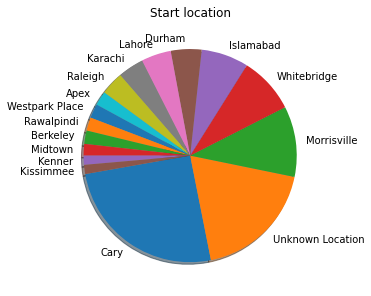

In [16]:
start_point = df.START.value_counts()
start_point_value=start_point[start_point>10]
pie=plt.pie(start_point_value,labels = start_point_value.index, shadow = True, startangle = 190)
plt.tight_layout()
plt.title("Start location")
plt.show()

According to above pie chart, Start location are more in Cary, Morrisville, Whitebridge and Islamabad, While there are some unknown locations which are grouped together.

In [17]:
start_point = df.START.value_counts()
start_point[start_point<10]

Downtown             9
Colombo              8
San Francisco        8
Orlando              8
Edgehill Farms       8
                    ..
Ridgeland            1
Daytona Beach        1
Sky Lake             1
Sand Lake Commons    1
Gampaha              1
Name: START, Length: 157, dtype: int64

Above are start point with lowest number of starts

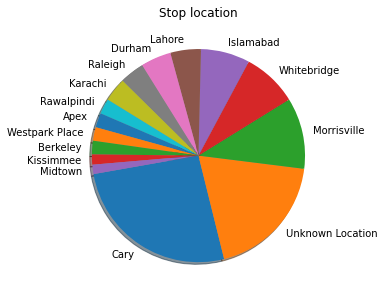

In [18]:
Stop_point = df.STOP.value_counts()
Stop_point_value=Stop_point[Stop_point > 10]
pie=plt.pie(Stop_point_value,labels = Stop_point_value.index, shadow = True, startangle = 190)
plt.tight_layout()
plt.title("Stop location")
plt.show()

Cary , Morrisville , Whitebridge and Islamabad have highest stop points. 

In [19]:
Stop_point = df.STOP.value_counts()
Stop_point[Stop_point <= 10]

New Orleans          10
Edgehill Farms       10
Kenner               10
Central               9
Emeryville            9
                     ..
Daytona Beach         1
Sand Lake Commons     1
Sky Lake              1
Vista East            1
Ilukwatta             1
Name: STOP, Length: 171, dtype: int64

These are places with the lowest stopping point.

Seeing the highest starting and stoping point, we can say that Cary, Morrisville, Whitebridge and Islamabad are famous destinations.

### ROUNDABOUT TRIPS

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


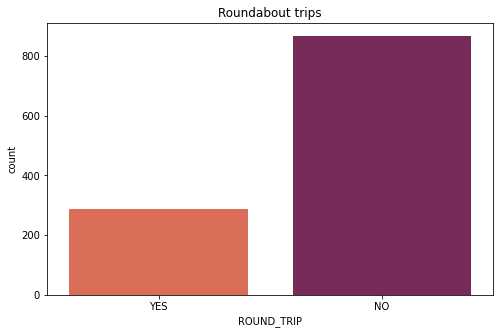

In [20]:
plt.figure(figsize=(8,5))
def round(x):
  if x['START'] == x['STOP']:
    return 'YES'
  else:
    return 'NO'  

df['ROUND_TRIP'] = df.apply(round, axis = 1)
sns.countplot(df['ROUND_TRIP'], palette = 'rocket_r').set(title='Roundabout trips')
plt.show()

### MILES & MINUTES TRAVELLED

In [21]:
print(np.max(df.MILES))
print(np.min(df.MILES))

310.3
0.5


In [22]:
bins = np.arange(0, 315, 15)
labels = [f"{i} - {i+15}" for i in range (0, 300, 15)]
df['MILES_bins'] = pd.cut(df['MILES'],bins=bins, labels=labels)

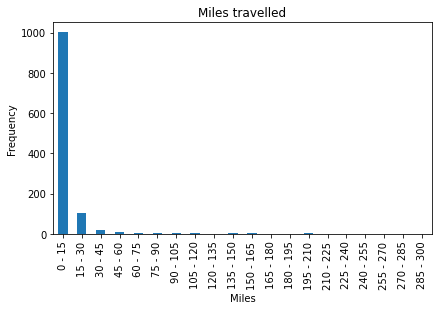

In [23]:
Miles = df.MILES_bins.value_counts(sort=False)
Miles.plot(kind = 'bar')
plt.tight_layout()
plt.title("Miles travelled")
plt.xlabel('Miles')
plt.ylabel('Frequency')
plt.show()

From the above plot, we can understand that mostly miles travelled are lower than 15 miles.

In [24]:
# calculating minutes of trip
df['MINUTES']=df.END_DATE - df.START_DATE
df['MINUTES'] = df['MINUTES'].dt.total_seconds()/60
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,ROUND_TRIP,MILES_bins,MINUTES
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,0 - 15,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,YES,0 - 15,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,0 - 15,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,0 - 15,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,60 - 75,67.0


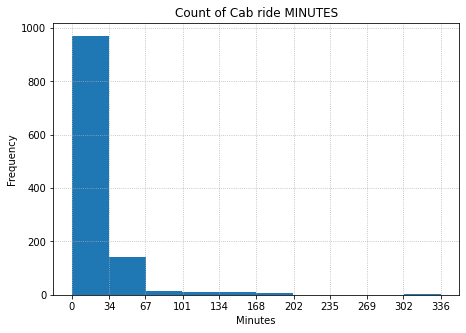

In [25]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
n, bins, patches = plt.hist(df.MINUTES)
plt.xticks(bins.round())
plt.grid(True, linestyle="dotted")
plt.title("Count of Cab ride MINUTES")
plt.xlabel('Minutes')
plt.ylabel('Frequency')

plt.show()

From the above plot, we can understand that mostly minutes travelled are lower than 30 minutes.

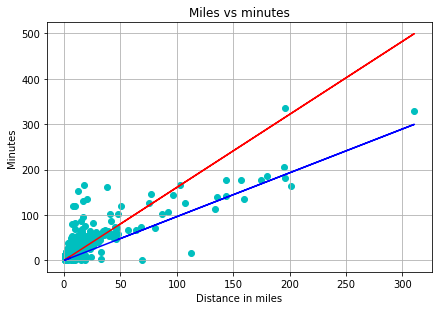

In [26]:
x1=df['MILES']
y1=(1/0.621371)*x1
x2=df['MILES']
y2=(1/1.03562)*x2
plt.scatter(df['MILES'],df['MINUTES'],color='c')
plt.plot(x1,y1,color='r')
plt.plot(x2,y2,color='b')
plt.tight_layout()
plt.title('Miles vs minutes')
plt.xlabel("Distance in miles")
plt.ylabel("Minutes")
plt.grid(True)
plt.show()

Data points below 

-red line indicate a speed greater than 60km/hr.

-blue line indicate a speed greater than 100km/hr.

Rides which cover longer distances are seen to traveling with a speed around 100km/hr. They could be using the highways. 

Also, we see that our conventional logic, that distance is proportional to time, is challenged as some cab rides took more time for less distance.

### MONTHLY RIDES

In [27]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [28]:
dic = {1:'Jan', 2: 'Feb', 3: 'Mar', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'Aug', 9: 'Sep',
      10: 'Oct', 11: 'Nov', 12: 'Dec' }

df['MONTH'] = df['MONTH'].map(dic)

In [29]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,ROUND_TRIP,MILES_bins,MINUTES,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,YES,0 - 15,6.0,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Meal/Entertain,YES,0 - 15,12.0,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,YES,0 - 15,13.0,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,YES,0 - 15,14.0,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,NO,60 - 75,67.0,Jan


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


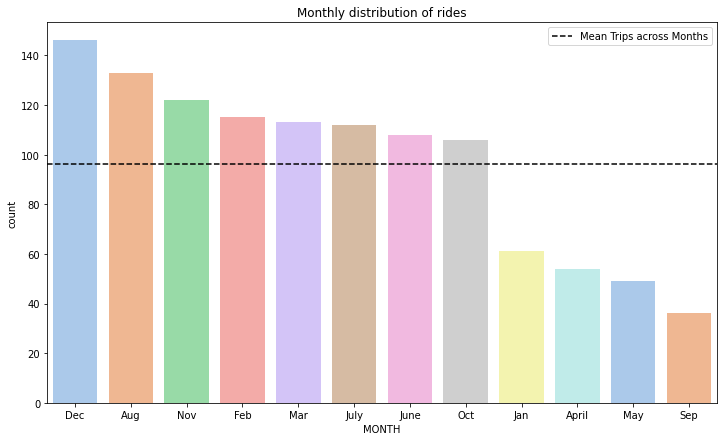

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(df['MONTH'], order = df['MONTH'].value_counts().index, palette="pastel").set(title='Monthly distribution of rides')
plt.axhline(df['MONTH'].value_counts().mean(),linestyle='--', color = 'k', label='Mean Trips across Months')
plt.legend()
plt.show()

Uber rides were taken the most in december. This could be because of the holiday season.

### CATEGORY & PURPOSE OF RIDES

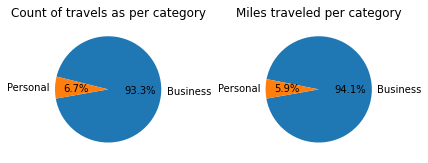

In [31]:
plt.subplot(1,2,1)
plt.pie(df['CATEGORY'].value_counts(),labels = df['CATEGORY'].unique(), startangle = 190,autopct="%1.1f%%")
plt.tight_layout()
plt.title("Count of travels as per category")

plt.subplot(1,2,2)
df1=df.groupby(df['CATEGORY'],as_index=False)['MILES'].sum()
plt.pie(df1['MILES'],labels = df1['CATEGORY'], startangle = 190,autopct="%1.1f%%")
plt.tight_layout()
plt.title("Miles traveled per category")

plt.show()

Uber rides are mainly taken by people out for business travels. Also, miles travelled is more for business purposes.

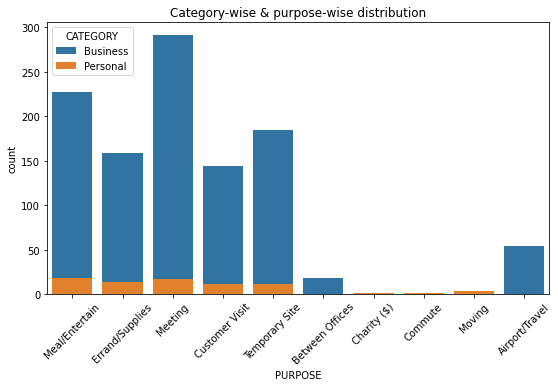

In [32]:
plt.figure(figsize=(9,5))
sns.countplot(data = df,x = "PURPOSE", hue="CATEGORY",dodge=False).set(title='Category-wise & purpose-wise distribution')
plt.xticks(rotation=45)
plt.show()

Uber rides were mostly taken by persons heading out for meetings.
The above plot makes clear distinction on the Purpose of Business rides and Personal rides. This may give insight to cab aggregators to decide which sector to introduce new cabs in.

## CONCLUSION

1.   Business Cab rides are not only more in volume, but also in distance travelled.
2. Cab traffic is mostly concentrated in 4 cities.
3.   Most of the cab rides are within a distance of 15 miles taking about 34 minutes.
4. Rides which cover longer distances are seen to traveling with a speed around 100km/hr. They could be using the highways. 
5. Seasonal pattern of cab ride exists, which is highest in December.
6. Main uses of cab rides are Meal/Entertainment, Customer visit, Meeting, Errand/Supplies.



***Python Mini project by-***

Sanika Tawate - 60009210161

Farin Khan - 60009210140